# 4Ï£ºÏ∞®: ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (EDA)

## ÌïôÏäµ Î™©Ìëú
- ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùò Í∏∞Î≥∏ Í∞úÎÖêÍ≥º Ï§ëÏöîÏÑ±ÏùÑ Ïù¥Ìï¥ÌïòÏûê
- Í∏∞Ïà†ÌÜµÍ≥ÑÏôÄ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÏûê
- ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Î≥ÄÏàò Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÌååÏïÖÌïòÏûê
- Ïù¥ÏÉÅÏπòÎ•º ÌÉêÏßÄÌïòÍ≥† Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÑ Î∞∞Ïö∞Ïûê

## 1. EDAÎûÄ Î¨¥ÏóáÏù∏Í∞Ä?

ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(Exploratory Data Analysis, EDA)ÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ìï¥ÌïòÎäî Ï≤´ Î≤àÏß∏ Îã®Í≥ÑÎã§.
Îç∞Ïù¥ÌÑ∞Ïùò Íµ¨Ï°∞, Ìå®ÌÑ¥, Ïù¥ÏÉÅÏπò, Î∂ÑÌè¨ Îì±ÏùÑ ÏãúÍ∞ÅÌôîÏôÄ ÌÜµÍ≥ÑÎ•º ÌÜµÌï¥ ÌååÏïÖÌïúÎã§.
ÏùåÏõê Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóêÏÑúÎäî ÌäπÌûà ÌäπÏßïÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÏôÄ Ïû•Î•¥Î≥Ñ Ï∞®Ïù¥Î•º Î∞úÍ≤¨ÌïòÎäî Îç∞ Ï§ëÏöîÌïòÎã§.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

### 2.1 ÏùåÏõê Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±

Ïã§Ï†ú ÏùåÏõê Î∂ÑÏÑùÏóêÏÑú ÏûêÏ£º ÏÇ¨Ïö©ÎêòÎäî ÌäπÏßïÎì§Î°ú Í∞ÄÏÉÅÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì§Ïñ¥Î≥¥Ïûê.
Í∞Å ÌäπÏßïÏùÄ ÏùåÏïÖÏùò Îã§Î•∏ Ï∏°Î©¥ÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, Ïû•Î•¥Î≥ÑÎ°ú Îã§Î•∏ Î∂ÑÌè¨Î•º Í∞ÄÏßÑÎã§.

In [2]:
# ÏãúÎìú ÏÑ§Ï†ïÏúºÎ°ú Ïû¨ÌòÑ Í∞ÄÎä•Ìïú Í≤∞Í≥º
np.random.seed(42)
n_tracks = 1000

# Ïû•Î•¥ Ï†ïÏùò
genres = ['Pop', 'Rock', 'Electronic', 'Classical', 'Jazz', 'Hip-Hop', 'Country']
genre_weights = [0.2, 0.18, 0.15, 0.12, 0.1, 0.15, 0.1]

# Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞
music_data = pd.DataFrame({
    'track_id': [f'T{i:04d}' for i in range(n_tracks)],
    'genre': np.random.choice(genres, n_tracks, p=genre_weights),
    'year': np.random.randint(1990, 2024, n_tracks)
})

# ÏùåÌñ• ÌäπÏßïÎì§ (0-1 Ïä§ÏºÄÏùº)
features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness', 
           'instrumentalness', 'liveness', 'speechiness', 'loudness']

# Ïû•Î•¥Î≥Ñ ÌäπÏÑ±ÏùÑ Î∞òÏòÅÌïú ÌäπÏßï ÏÉùÏÑ±
for feature in features:
    music_data[feature] = 0.0

# Ïû•Î•¥Î≥Ñ ÌäπÏÑ± Ï†ïÏùò
for genre in genres:
    mask = music_data['genre'] == genre
    count = mask.sum()
    
    if genre == 'Pop':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.65, 0.15, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(6, 3, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(7, 3, count)
        music_data.loc[mask, 'valence'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(3, 7, count)
    elif genre == 'Rock':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.7, 0.2, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(8, 2, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'valence'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(2, 8, count)
        music_data.loc[mask, 'loudness'] = np.random.beta(7, 3, count)
    elif genre == 'Electronic':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.75, 0.15, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(7, 2, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(8, 2, count)
        music_data.loc[mask, 'valence'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(1, 9, count)
        music_data.loc[mask, 'instrumentalness'] = np.random.beta(6, 4, count)
    elif genre == 'Classical':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.4, 0.2, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(3, 7, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(2, 8, count)
        music_data.loc[mask, 'valence'] = np.random.beta(4, 6, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(9, 1, count)
        music_data.loc[mask, 'instrumentalness'] = np.random.beta(8, 2, count)
        music_data.loc[mask, 'liveness'] = np.random.beta(6, 4, count)
    elif genre == 'Jazz':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.55, 0.25, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(4, 6, count)
        music_data.loc[mask, 'valence'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(7, 3, count)
        music_data.loc[mask, 'instrumentalness'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'liveness'] = np.random.beta(7, 3, count)
    elif genre == 'Hip-Hop':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.5, 0.15, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(8, 2, count)
        music_data.loc[mask, 'valence'] = np.random.beta(4, 6, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(2, 8, count)
        music_data.loc[mask, 'speechiness'] = np.random.beta(7, 3, count)
        music_data.loc[mask, 'loudness'] = np.random.beta(6, 4, count)
    else:  # Country
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.6, 0.2, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'valence'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(6, 4, count)

# Í∏∞Î≥∏ ÌäπÏßïÏù¥ ÏóÜÎäî Í≤ΩÏö∞ ÎûúÎç§ Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
for feature in ['instrumentalness', 'liveness', 'speechiness', 'loudness']:
    mask = music_data[feature] == 0
    music_data.loc[mask, feature] = np.random.beta(3, 7, mask.sum())

# Ïù∏Í∏∞ÎèÑ Ï†êÏàò (0-100)
music_data['popularity'] = np.random.beta(3, 5, n_tracks) * 100

# Ìä∏Îûô Í∏∏Ïù¥ (Ï¥à)
music_data['duration_ms'] = np.random.randint(90000, 480001, n_tracks)

print(f"ÏùåÏõê Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å!")
print(f"Ï¥ù {n_tracks}Í∞ú Ìä∏Îûô, {len(genres)}Í∞ú Ïû•Î•¥")
print(f"ÌäπÏßï Ïàò: {len(features) + 3}Í∞ú")
print(f"Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {music_data.shape}")

ÏùåÏõê Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÏôÑÎ£å!
Ï¥ù 1000Í∞ú Ìä∏Îûô, 7Í∞ú Ïû•Î•¥
ÌäπÏßï Ïàò: 12Í∞ú
Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (1000, 14)


## 3. Îç∞Ïù¥ÌÑ∞ Í∞úÏöî ÌååÏïÖ

### 3.1 Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏

In [3]:
# Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥
print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"Ìñâ Ïàò: {music_data.shape[0]}")
print(f"Ïó¥ Ïàò: {music_data.shape[1]}")
print(f"Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: {music_data.memory_usage(deep=True).sum() / 1024:.2f} KB")
print()

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ
print("=== Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===")
print(music_data.dtypes)
print()

# Í≤∞Ï∏°Í∞í ÌôïÏù∏
print("=== Í≤∞Ï∏°Í∞í ÌôïÏù∏ ===")
missing_values = music_data.isnull().sum()
if missing_values.sum() == 0:
    print("Í≤∞Ï∏°Í∞í ÏóÜÏùå ‚úÖ")
else:
    print(missing_values[missing_values > 0])
print()

# Ïû•Î•¥ Î∂ÑÌè¨
print("=== Ïû•Î•¥ Î∂ÑÌè¨ ===")
genre_counts = music_data['genre'].value_counts()
for genre, count in genre_counts.items():
    percentage = count / len(music_data) * 100
    print(f"{genre}: {count}Í∞ú ({percentage:.1f}%)")

# Ï≤òÏùå 5Í∞ú Ìñâ ÌôïÏù∏
print("\n=== ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ===")
display(music_data.head())

=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Ìñâ Ïàò: 1000
Ïó¥ Ïàò: 14
Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 215.94 KB

=== Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ===
track_id             object
genre                object
year                  int64
tempo               float64
energy              float64
danceability        float64
valence             float64
acousticness        float64
instrumentalness    float64
liveness            float64
speechiness         float64
loudness            float64
popularity          float64
duration_ms           int64
dtype: object

=== Í≤∞Ï∏°Í∞í ÌôïÏù∏ ===
Í≤∞Ï∏°Í∞í ÏóÜÏùå ‚úÖ

=== Ïû•Î•¥ Î∂ÑÌè¨ ===
Pop: 225Í∞ú (22.5%)
Rock: 176Í∞ú (17.6%)
Hip-Hop: 143Í∞ú (14.3%)
Electronic: 137Í∞ú (13.7%)
Classical: 133Í∞ú (13.3%)
Country: 100Í∞ú (10.0%)
Jazz: 86Í∞ú (8.6%)

=== ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ===


track_id      genre  year     tempo    energy  danceability   valence  \
0    T0000       Rock  2001  0.608047  0.458752      0.245732  0.588923   
1    T0001    Country  2005  0.469144  0.347692      0.458378  0.315818   
2    T0002       Jazz  2013  0.852342  0.515877      0.651520  0.620969   
3    T0003  Classical  2008  0.397620  0.365457      0.178130  0.374280   
4    T0004        Pop  1997  0.527422  0.862563      0.662164  0.679737   

   acousticness  instrumentalness  liveness  speechiness  loudness  \
0      0.282447          0.088074  0.336673     0.464900  0.311668   
1      0.509574          0.399501  0.473608     0.043432  0.398806   
2      0.572717          0.209833  0.898986     0.162273  0.179950   
3      0.710489          0.542374  0.767818     0.341070  0.358164   
4      0.279537          0.298738  0.812308     0.260971  0.136211   

   popularity  duration_ms  
0   39.319875       465950  
1   36.434200       173165  
2   35.048203       164167  
3   36.568503       267431  
4   37.630879       350069

### 3.2 ÏàòÏπòÌòï Î≥ÄÏàò Í∏∞Ïà†ÌÜµÍ≥Ñ

Í∏∞Ïà†ÌÜµÍ≥ÑÎäî Îç∞Ïù¥ÌÑ∞Ïùò 'Ï≤´Ïù∏ÏÉÅ'ÏùÑ ÏïåÎ†§Ï§ÄÎã§. ÌèâÍ∑†, Ï§ëÏïôÍ∞í, ÌëúÏ§ÄÌé∏Ï∞® Îì±ÏùÑ ÌÜµÌï¥ Í∞Å ÌäπÏßïÏùò Î≤îÏúÑÏôÄ Î∂ÑÌè¨Î•º Ïù¥Ìï¥Ìï† Ïàò ÏûàÎã§.
ÏùåÏõê Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ÏóêÎÑàÏßÄÎÇò ÎåÑÏÑúÎπåÎ¶¨Ìã∞ Í∞ôÏùÄ ÌäπÏßïÎì§Ïù¥ Ïñ¥Îñ§ Î≤îÏúÑÏóê Î∂ÑÌè¨ÌïòÎäîÏßÄ, ÏñºÎßàÎÇò Îã§ÏñëÌïúÏßÄ ÌååÏïÖÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§.

In [4]:
# ÏàòÏπòÌòï Î≥ÄÏàò ÏÑ†ÌÉù
numeric_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness', 
                   'instrumentalness', 'liveness', 'speechiness', 'loudness', 
                   'popularity', 'duration_ms', 'year']

# Í∏∞Ïà†ÌÜµÍ≥Ñ
desc_stats = music_data[numeric_features].describe()
print("=== Í∏∞Ïà†ÌÜµÍ≥Ñ ===")
print(desc_stats.round(3))
print()

# Ï∂îÍ∞Ä ÌÜµÍ≥ÑÎüâ
print("=== Ï∂îÍ∞Ä ÌÜµÍ≥ÑÎüâ ===")
for feature in numeric_features[:9]:  # ÏùåÌñ• ÌäπÏßïÎßå
    data = music_data[feature]
    print(f"{feature}:")
    print(f"  ÏôúÎèÑ(Skewness): {stats.skew(data):.3f}")
    print(f"  Ï≤®ÎèÑ(Kurtosis): {stats.kurtosis(data):.3f}")
    print(f"  Î≥ÄÎèôÍ≥ÑÏàò(CV): {data.std()/data.mean():.3f}")
    print()

=== Í∏∞Ïà†ÌÜµÍ≥Ñ ===
          tempo    energy  danceability   valence  acousticness  \
count  1000.000  1000.000      1000.000  1000.000      1000.000   
mean      0.598     0.614         0.586     0.518         0.387   
std       0.210     0.214         0.246     0.169         0.295   
min       0.000     0.039         0.014     0.060         0.000   
25%       0.457     0.459         0.412     0.393         0.149   
50%       0.610     0.640         0.624     0.530         0.284   
75%       0.740     0.786         0.792     0.641         0.611   
max       1.000     0.981         0.991     0.924         0.999   

       instrumentalness  liveness  speechiness  loudness  popularity  \
count          1000.000  1000.000     1000.000  1000.000    1000.000   
mean              0.432     0.382        0.354     0.415      37.093   
std               0.237     0.193        0.197     0.212      15.925   
min               0.022     0.039        0.031     0.028       3.042   
25%            

## 4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Î∂ÑÏÑù

Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Î≥¥Î©¥ 'Îç∞Ïù¥ÌÑ∞Ïùò Î™®Ïñë'ÏùÑ Ïïå Ïàò ÏûàÎã§. ÎåÄÎ∂ÄÎ∂ÑÏùò Í∞íÏù¥ Ïñ¥ÎîîÏóê Î™∞Î†§ÏûàÎäîÏßÄ, ÏπòÏö∞Ï≥ê ÏûàÎäîÏßÄ, Ïó¨Îü¨ Í∞úÏùò Î¥âÏö∞Î¶¨Í∞Ä ÏûàÎäîÏßÄ Îì±ÏùÑ ÌååÏïÖÌïúÎã§.
Ïù¥Îäî ÎÇòÏ§ëÏóê Ïñ¥Îñ§ Î∂ÑÏÑù Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï†ÏßÄ Í≤∞Ï†ïÌïòÎäî Îç∞ Ï§ëÏöîÌïú Îã®ÏÑúÍ∞Ä ÎêúÎã§.

### 4.1 Îã®Î≥ÄÎüâ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî

Í∞Å ÌäπÏßïÏù¥ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Ïñ¥Îñ§ Î∂ÑÌè¨Î•º Í∞ÄÏßÄÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê. ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò 'Î™®Ïñë'ÏùÑ, Î∞ïÏä§ÌîåÎ°ØÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò 'ÏöîÏïΩ'ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.
ÏùåÏõê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏóêÎÑàÏßÄÍ∞Ä ÎÜíÏùÄ Í≥°Ïù¥ ÎßéÏùÄÏßÄ, ÎåÑÏÑúÎπåÎ¶¨Ìã∞Í∞Ä Í≥†Î•¥Í≤å Î∂ÑÌè¨ÌïòÎäîÏßÄ Îì±ÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌååÏïÖÌï† Ïàò ÏûàÎã§.

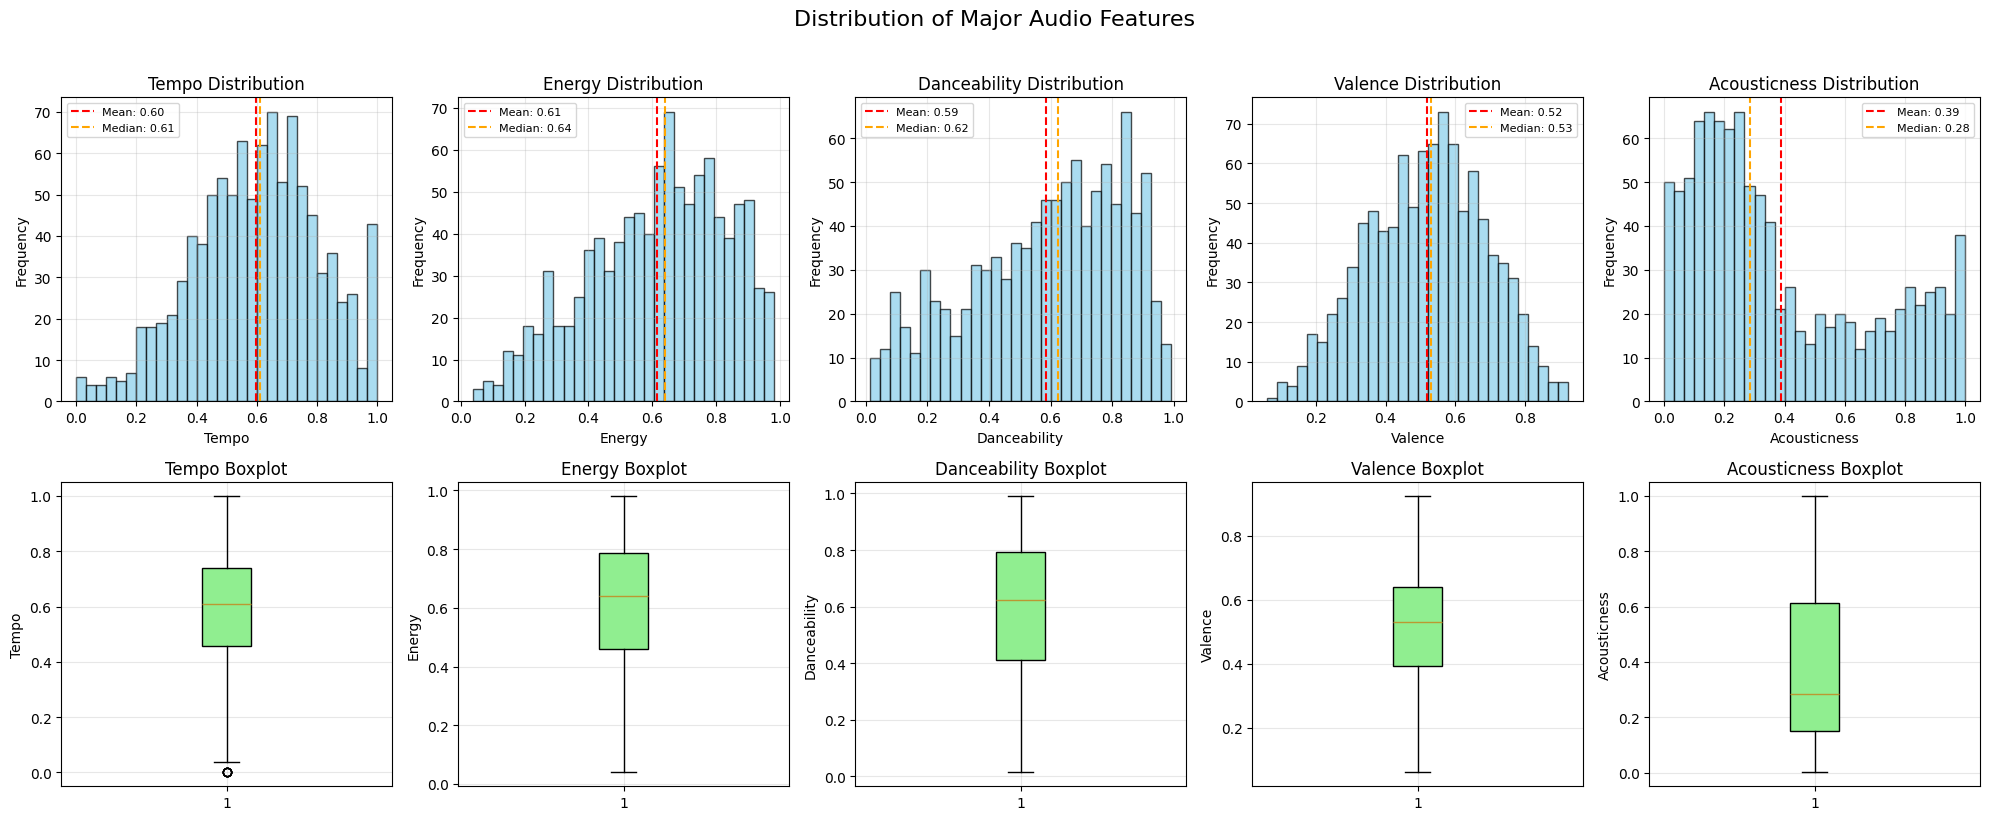

üìä Î∂ÑÌè¨ Ìï¥ÏÑù:
  tempo: ÎåÄÏπ≠Ï†Å (ÏôúÎèÑ: -0.24)
  energy: ÎåÄÏπ≠Ï†Å (ÏôúÎèÑ: -0.40)
  danceability: ÎåÄÏπ≠Ï†Å (ÏôúÎèÑ: -0.48)
  valence: ÎåÄÏπ≠Ï†Å (ÏôúÎèÑ: -0.12)
  acousticness: Ïö∞Ï∏° ÏπòÏö∞Ïπ® (ÏôúÎèÑ: 0.68)


In [5]:
# Ï£ºÏöî ÏùåÌñ• ÌäπÏßïÎì§Ïùò Î∂ÑÌè¨
main_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness']

# ÌûàÏä§ÌÜ†Í∑∏Îû®Í≥º Î∞ïÏä§ÌîåÎ°Ø ÏÑúÎ∏åÌîåÎ°Ø
fig, axes = plt.subplots(2, len(main_features), figsize=(20, 8))
fig.suptitle('Distribution of Major Audio Features', fontsize=16, y=1.02)

for i, feature in enumerate(main_features):
    # ÌûàÏä§ÌÜ†Í∑∏Îû®
    axes[0, i].hist(music_data[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{feature.title()} Distribution')
    axes[0, i].set_xlabel(feature.title())
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)
    
    # ÌÜµÍ≥ÑÍ∞í ÌëúÏãú
    mean_val = music_data[feature].mean()
    median_val = music_data[feature].median()
    axes[0, i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[0, i].axvline(median_val, color='orange', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[0, i].legend(fontsize=8)
    
    # Î∞ïÏä§ÌîåÎ°Ø
    box_plot = axes[1, i].boxplot(music_data[feature], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightgreen')
    axes[1, i].set_title(f'{feature.title()} Boxplot')
    axes[1, i].set_ylabel(feature.title())
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("üìä Î∂ÑÌè¨ Ìï¥ÏÑù:")
for feature in main_features:
    skewness = stats.skew(music_data[feature])
    if abs(skewness) < 0.5:
        skew_desc = "ÎåÄÏπ≠Ï†Å"
    elif skewness > 0.5:
        skew_desc = "Ïö∞Ï∏° ÏπòÏö∞Ïπ®"
    else:
        skew_desc = "Ï¢åÏ∏° ÏπòÏö∞Ïπ®"
    print(f"  {feature}: {skew_desc} (ÏôúÎèÑ: {skewness:.2f})")

### 4.2 Ïû•Î•¥Î≥Ñ Î∂ÑÌè¨ ÎπÑÍµê

Í∞ôÏùÄ ÌäπÏßïÏù¥ÎùºÎèÑ Ïû•Î•¥ÎßàÎã§ Îã§Î•∏ Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù∏Îã§. ÏòàÎ•º Îì§Ïñ¥ ÌÅ¥ÎûòÏãùÏùÄ Ïñ¥Ïø†Ïä§Ìã±Ïù¥ ÎÜíÍ≥†, ÏùºÎ†âÌä∏Î°úÎãâÏùÄ ÎåÑÏÑúÎπåÎ¶¨Ìã∞Í∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§.
Ïù¥Îü∞ Ï∞®Ïù¥Î•º ÏãúÍ∞ÅÌôîÌïòÎ©¥ Ïû•Î•¥ Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÎßåÎì§ Îïå Ïñ¥Îñ§ ÌäπÏßïÏù¥ Ï§ëÏöîÌïúÏßÄ ÌûåÌä∏Î•º ÏñªÏùÑ Ïàò ÏûàÎã§.

In [ ]:
# PlotlyÎ°ú Ïù∏ÌÑ∞ÎûôÌã∞Î∏å Î∂ÑÌè¨ ÎπÑÍµê
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=['Tempo', 'Energy', 'Danceability', 'Valence', 'Acousticness', 'Overall Distribution'],
    specs=[[{'type': 'box'}, {'type': 'box'}, {'type': 'box'}],
           [{'type': 'box'}, {'type': 'box'}, {'type': 'violin'}]]
)

features_to_plot = ['tempo', 'energy', 'danceability', 'valence', 'acousticness']
positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2)]

# Í∞Å ÌäπÏßïÏóê ÎåÄÌïú Ïû•Î•¥Î≥Ñ Î∞ïÏä§ÌîåÎ°Ø
for feature, (row, col) in zip(features_to_plot, positions):
    for genre in genres:
        genre_data = music_data[music_data['genre'] == genre][feature]
        fig.add_trace(
            go.Box(y=genre_data, name=genre, showlegend=False),
            row=row, col=col
        )

# Ï†ÑÏ≤¥ ÌäπÏßï ÎπÑÍµêÎ•º ÏúÑÌïú Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø
for i, feature in enumerate(features_to_plot):
    fig.add_trace(
        go.Violin(y=music_data[feature], name=feature, box_visible=True, meanline_visible=True),
        row=2, col=3
    )

fig.update_layout(
    title='Audio Feature Distribution Comparison by Genre',
    height=800,
    showlegend=True
)

fig.show()

# Ïû•Î•¥Î≥Ñ ÌèâÍ∑†Í∞í ÎπÑÍµê
genre_means = music_data.groupby('genre')[features_to_plot].mean()
print("\nüéµ Ïû•Î•¥Î≥Ñ ÌäπÏßï ÌèâÍ∑†Í∞í:")
print(genre_means.round(3))

## 5. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÄ "Ïù¥ ÌäπÏßïÏù¥ ÎÜíÏúºÎ©¥ Ï†Ä ÌäπÏßïÎèÑ ÎÜíÏïÑÏßàÍπå?"ÎùºÎäî ÏßàÎ¨∏Ïóê ÎãµÌïúÎã§.
ÏòàÎ•º Îì§Ïñ¥ ÏóêÎÑàÏßÄÍ∞Ä ÎÜíÏùÄ Í≥°ÏùÄ ÎåÑÏÑúÎπåÎ¶¨Ìã∞ÎèÑ ÎÜíÏùÑÍπå? Ïñ¥Ïø†Ïä§Ìã±Ìïú Í≥°ÏùÄ ÏóêÎÑàÏßÄÍ∞Ä ÎÇÆÏùÑÍπå?
Ïù¥Îü∞ Í¥ÄÍ≥ÑÎ•º ÏïåÎ©¥ Ï§ëÎ≥µÎêòÎäî ÌäπÏßïÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò, ÏÉàÎ°úÏö¥ ÌäπÏßïÏùÑ ÎßåÎì§ ÏïÑÏù¥ÎîîÏñ¥Î•º ÏñªÏùÑ Ïàò ÏûàÎã§.

### 5.1 ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞Í≥º ÌûàÌä∏Îßµ

Î™®Îì† ÌäπÏßï ÏåçÏùò Í¥ÄÍ≥ÑÎ•º ÌïúÎààÏóê ÌååÏïÖÌï¥Î≥¥Ïûê. ÌûàÌä∏ÎßµÏùÄ Ïà´ÏûêÎ°ú Îêú ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÏÉâÍπîÎ°ú ÌëúÌòÑÌï¥ÏÑú ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï§ÄÎã§.
Îπ®Í∞ÑÏÉâ(ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ), ÌååÎûÄÏÉâ(ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ), Ìù∞ÏÉâ(Í¥ÄÍ≥ÑÏóÜÏùå)ÏúºÎ°ú Ìå®ÌÑ¥ÏùÑ ÏâΩÍ≤å Î∞úÍ≤¨Ìï† Ïàò ÏûàÎã§.

In [ ]:
# ÏàòÏπòÌòï ÌäπÏßïÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
audio_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness', 
                 'instrumentalness', 'liveness', 'speechiness', 'loudness']

correlation_matrix = music_data[audio_features].corr()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ (Seaborn)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # ÏÉÅÏÇºÍ∞Å ÎßàÏä§ÌÅ¨

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .8})

plt.title('Audio Features Correlation Heatmap', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï∞æÍ∏∞
print("üîç Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.5):")
strong_corr = []

for i in range(len(audio_features)):
    for j in range(i+1, len(audio_features)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append((audio_features[i], audio_features[j], corr_val))
            print(f"  {audio_features[i]} ‚Üî {audio_features[j]}: {corr_val:.3f}")

if not strong_corr:
    print("  Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Î∞úÍ≤¨ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

### 5.2 ÏÇ∞Ï†êÎèÑÎ•º ÌÜµÌïú Í¥ÄÍ≥Ñ ÌÉêÏÉâ

ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Ïà´Ïûê ÌïòÎÇòÎ°ú Í¥ÄÍ≥ÑÎ•º ÏöîÏïΩÌïòÏßÄÎßå, ÏÇ∞Ï†êÎèÑÎäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Ï†êÎì§ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.
ÌéòÏñ¥ÌîåÎ°ØÏùÑ Î≥¥Î©¥ Ïñ¥Îñ§ ÌäπÏßï Ï°∞Ìï©Ïù¥ Ïû•Î•¥Î•º Ïûò Íµ¨Î∂ÑÌïòÎäîÏßÄ, ÏÑ†Ìòï Í¥ÄÍ≥ÑÏù∏ÏßÄ ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÏù∏ÏßÄ Ïïå Ïàò ÏûàÎã§.
Ïû•Î•¥Î≥ÑÎ°ú ÏÉâÍπîÏùÑ Îã§Î•¥Í≤å ÌïòÎ©¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìå®ÌÑ¥ÎèÑ Î∞úÍ≤¨Ìï† Ïàò ÏûàÎã§.

In [ ]:
# Ï£ºÏöî ÌäπÏßïÎì§Ïùò ÌéòÏñ¥ÌîåÎ°Ø
key_features = ['energy', 'danceability', 'valence', 'acousticness', 'tempo']

# ÏÉòÌîåÎßÅ (ÏãúÍ∞ÅÌôî ÏÑ±Îä•ÏùÑ ÏúÑÌï¥)
sample_data = music_data.sample(n=500, random_state=42)

# Seaborn ÌéòÏñ¥ÌîåÎ°Ø
g = sns.pairplot(sample_data[key_features + ['genre']], 
                 hue='genre', 
                 diag_kind='hist',
                 plot_kws={'alpha': 0.6, 's': 30})

g.fig.suptitle('Pairplot of Major Audio Features', y=1.02, fontsize=14)
plt.show()

# Ïù∏ÌÑ∞ÎûôÌã∞Î∏å ÏÇ∞Ï†êÎèÑ (Plotly)
fig = px.scatter_matrix(
    sample_data,
    dimensions=key_features,
    color='genre',
    title='Audio Features Scatter Plot Matrix (Interactive)',
    height=800
)

fig.update_layout(dragmode='select')
fig.show()

print("üí° ÌéòÏñ¥ÌîåÎ°Ø Ìï¥ÏÑù Í∞ÄÏù¥Îìú:")
print("  - ÎåÄÍ∞ÅÏÑ†: Í∞Å Î≥ÄÏàòÏùò Î∂ÑÌè¨")
print("  - ÌïòÏÇºÍ∞Å: ÏÇ∞Ï†êÎèÑÎ°ú Í¥ÄÍ≥Ñ ÌôïÏù∏")
print("  - ÏÉâÏÉÅ: Ïû•Î•¥Î≥Ñ Íµ¨Î∂Ñ")
print("  - ÌÅ¥Îü¨Ïä§ÌÑ∞: ÎπÑÏä∑Ìïú ÌäπÏÑ±Ïùò Í∑∏Î£π")

### 5.3 ÌäπÏ†ï Í¥ÄÍ≥Ñ Ïã¨Ï∏µ Î∂ÑÏÑù

Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌÉêÏÉâ ÌõÑÏóêÎäî ÌäπÎ≥ÑÌûà Ìù•ÎØ∏Î°úÏö¥ Í¥ÄÍ≥ÑÎ•º Í≥®ÎùºÏÑú ÏûêÏÑ∏Ìûà Î∂ÑÏÑùÌïúÎã§.
ÏòàÎ•º Îì§Ïñ¥ ÏóêÎÑàÏßÄÏôÄ ÎåÑÏÑúÎπåÎ¶¨Ìã∞Ïùò Í¥ÄÍ≥ÑÎ•º Ïû•Î•¥Î≥Ñ, ÏãúÎåÄÎ≥ÑÎ°ú ÎÇòÎàÑÏñ¥ Î≥¥Î©¥ Îçî ÏÑ∏Î∞ÄÌïú Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÏñªÏùÑ Ïàò ÏûàÎã§.
Ïù¥Îü∞ Ïã¨Ï∏µ Î∂ÑÏÑùÏù¥ ÎÇòÏ§ëÏóê Î™®Îç∏ÎßÅÏùò ÏïÑÏù¥ÎîîÏñ¥Í∞Ä ÎêúÎã§.

In [ ]:
# Energy vs Danceability Í¥ÄÍ≥Ñ Ïã¨Ï∏µ Î∂ÑÏÑù
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ï†ÑÏ≤¥ ÏÇ∞Ï†êÎèÑ
scatter = axes[0].scatter(music_data['energy'], music_data['danceability'], 
                         c=music_data['valence'], cmap='viridis', alpha=0.6, s=20)
axes[0].set_xlabel('Energy')
axes[0].set_ylabel('Danceability')
axes[0].set_title('Energy vs Danceability (Color: Valence)')
plt.colorbar(scatter, ax=axes[0], label='Valence')

# ÌöåÍ∑ÄÏÑ† Ï∂îÍ∞Ä
z = np.polyfit(music_data['energy'], music_data['danceability'], 1)
p = np.poly1d(z)
axes[0].plot(music_data['energy'], p(music_data['energy']), "r--", alpha=0.8)

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌëúÏãú
r_value = music_data['energy'].corr(music_data['danceability'])
axes[0].text(0.05, 0.95, f'r = {r_value:.3f}', transform=axes[0].transAxes, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ïû•Î•¥Î≥Ñ ÌèâÍ∑†Í∞í
genre_means = music_data.groupby('genre')[['energy', 'danceability']].mean()
axes[1].scatter(genre_means['energy'], genre_means['danceability'], 
               s=100, alpha=0.8, c=range(len(genres)), cmap='tab10')

for i, genre in enumerate(genres):
    axes[1].annotate(genre, 
                    (genre_means.loc[genre, 'energy'], genre_means.loc[genre, 'danceability']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[1].set_xlabel('Energy (Average)')
axes[1].set_ylabel('Danceability (Average)')
axes[1].set_title('Genre-wise Energy vs Danceability Averages')
axes[1].grid(True, alpha=0.3)

# ÏãúÎåÄÎ≥Ñ Î≥ÄÌôî
decade_data = music_data.copy()
decade_data['decade'] = (decade_data['year'] // 10) * 10
decade_means = decade_data.groupby('decade')[['energy', 'danceability']].mean()

axes[2].plot(decade_means.index, decade_means['energy'], 'o-', label='Energy', linewidth=2)
axes[2].plot(decade_means.index, decade_means['danceability'], 's-', label='Danceability', linewidth=2)
axes[2].set_xlabel('Decade')
axes[2].set_ylabel('Average Value')
axes[2].set_title('Temporal Change in Energy & Danceability')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ± Í≤ÄÏ†ï
from scipy.stats import pearsonr
stat, p_value = pearsonr(music_data['energy'], music_data['danceability'])
print(f"üìà EnergyÏôÄ Danceability ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
print(f"  ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {stat:.4f}")
print(f"  p-value: {p_value:.4e}")
print(f"  Ïú†ÏùòÏÑ±: {'Ïú†ÏùòÌï® (p < 0.05)' if p_value < 0.05 else 'Ïú†ÏùòÌïòÏßÄ ÏïäÏùå'}")

## 6. Ïù¥ÏÉÅÏπò ÌÉêÏßÄÏôÄ Î∂ÑÏÑù

Ïù¥ÏÉÅÏπò(outlier)Îäî Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌòÑÏ†ÄÌûà Îã§Î•∏ Í∞íÎì§Ïù¥Îã§. Ïù¥Îì§ÏùÄ ÏûÖÎ†• Ïò§Î•òÏùº ÏàòÎèÑ ÏûàÍ≥†, Ï†ïÎßê ÌäπÎ≥ÑÌïú ÏùåÏïÖÏùº ÏàòÎèÑ ÏûàÎã§.
ÏòàÎ•º Îì§Ïñ¥ ÌÅ¥ÎûòÏãù Í≥°Ïù∏Îç∞ ÎåÑÏÑúÎπåÎ¶¨Ìã∞Í∞Ä Îß§Ïö∞ ÎÜíÎã§Î©¥? Ïù¥Îü∞ ÌäπÏù¥Ìïú Í≤ΩÏö∞Îì§ÏùÑ Ï∞æÏïÑÏÑú Î∂ÑÏÑùÌï¥Î≥¥Ïûê.

### 6.1 Îã®Î≥ÄÎüâ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ

Í∞Å ÌäπÏßïÎ≥ÑÎ°ú Í∑πÎã®Ï†ÅÏù∏ Í∞íÎì§ÏùÑ Ï∞æÏïÑÎ≥¥Ïûê. IQR Î∞©Î≤ïÍ≥º Z-score Î∞©Î≤ï Îëê Í∞ÄÏßÄÎ°ú Ïù¥ÏÉÅÏπòÎ•º ÌÉêÏßÄÌïúÎã§.
- IQR: Î∞ïÏä§ÌîåÎ°ØÏùò ÏàòÏóºÏùÑ Î≤óÏñ¥ÎÇòÎäî Í∞íÎì§ (Î∂ÑÌè¨Ïóê ÏÉÅÍ¥ÄÏóÜÏù¥ Ï†ÅÏö© Í∞ÄÎä•)
- Z-score: ÌèâÍ∑†ÏóêÏÑú 3œÉ Ïù¥ÏÉÅ Îñ®Ïñ¥ÏßÑ Í∞íÎì§ (Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï)

Îëê Î∞©Î≤ïÏùò Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÎ©¥ Ïñ¥Îñ§ Í∏∞Ï§ÄÏù¥ Îçî Ï†ÅÏ†àÌïúÏßÄ ÌåêÎã®Ìï† Ïàò ÏûàÎã§.

In [ ]:
def detect_outliers_iqr(data, column):
    """IQR Î∞©Î≤ïÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Z-score Î∞©Î≤ïÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ"""
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# Ï£ºÏöî ÌäπÏßïÎì§Ïùò Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
outlier_features = ['tempo', 'energy', 'danceability', 'valence', 'popularity']

fig, axes = plt.subplots(2, len(outlier_features), figsize=(20, 8))
fig.suptitle('Outlier Detection - IQR vs Z-score Methods', fontsize=16)

outlier_summary = {}

for i, feature in enumerate(outlier_features):
    # IQR Î∞©Î≤ï
    iqr_outliers, lower, upper = detect_outliers_iqr(music_data, feature)
    
    # Z-score Î∞©Î≤ï
    zscore_outliers = detect_outliers_zscore(music_data, feature)
    
    outlier_summary[feature] = {
        'IQR': len(iqr_outliers),
        'Z-score': len(zscore_outliers)
    }
    
    # Î∞ïÏä§ÌîåÎ°Ø (IQR Ïù¥ÏÉÅÏπò ÌëúÏãú)
    bp1 = axes[0, i].boxplot(music_data[feature], patch_artist=True)
    bp1['boxes'][0].set_facecolor('lightblue')
    axes[0, i].scatter(np.ones(len(iqr_outliers)), iqr_outliers[feature], 
                      color='red', alpha=0.6, s=20)
    axes[0, i].set_title(f'{feature}\nIQR Outliers: {len(iqr_outliers)}')
    axes[0, i].set_ylabel('Value')
    
    # ÌûàÏä§ÌÜ†Í∑∏Îû® (Z-score Ïù¥ÏÉÅÏπò ÌëúÏãú)
    axes[1, i].hist(music_data[feature], bins=30, alpha=0.7, color='lightgreen')
    axes[1, i].hist(zscore_outliers[feature], bins=30, alpha=0.8, color='red')
    axes[1, i].set_title(f'Z-score Outliers: {len(zscore_outliers)}')
    axes[1, i].set_xlabel(feature)
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Ïù¥ÏÉÅÏπò ÏöîÏïΩ
print("üö® Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í≤∞Í≥º:")
print("ÌäπÏßï\t\tIQR Î∞©Î≤ï\tZ-score Î∞©Î≤ï")
print("-" * 40)
for feature in outlier_features:
    iqr_count = outlier_summary[feature]['IQR']
    zscore_count = outlier_summary[feature]['Z-score']
    print(f"{feature:<15}{iqr_count:>6}Í∞ú\t{zscore_count:>8}Í∞ú")

### 6.2 Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ

Îã®Ïùº ÌäπÏßïÏúºÎ°úÎäî Ï†ïÏÉÅÏù¥ÏßÄÎßå, Ïó¨Îü¨ ÌäπÏßïÏùÑ Ï¢ÖÌï©ÌïòÎ©¥ Ïù¥ÏÉÅÌïú Ï°∞Ìï©Ïù∏ Í≤ΩÏö∞Í∞Ä ÏûàÎã§.
Ïòà: ÏóêÎÑàÏßÄÎäî Î≥¥ÌÜµ, ÎåÑÏÑúÎπåÎ¶¨Ìã∞ÎèÑ Î≥¥ÌÜµÏù¥ÏßÄÎßå, Ïù¥ Ï°∞Ìï©Ïù¥ Ìï¥Îãπ Ïû•Î•¥ÏóêÏÑúÎäî Îß§Ïö∞ ÎìúÎ¨∏ Í≤ΩÏö∞.
Isolation Forest ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Ïù¥Îü∞ 'Îã§Ï∞®Ïõê Ïù¥ÏÉÅÏπò'Î•º Ï∞æÏùÑ Ïàò ÏûàÎã§.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÏπò ÌÉêÏßÄÎ•º ÏúÑÌïú ÌäπÏßï ÏÑ†ÌÉù
multi_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness']
X = music_data[multi_features].values

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation ForestÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X_scaled)

# Ïù¥ÏÉÅÏπòÏôÄ Ï†ïÏÉÅÏπò Î∂ÑÎ¶¨
music_data_with_outliers = music_data.copy()
music_data_with_outliers['is_outlier'] = outlier_labels == -1

outliers_multi = music_data_with_outliers[music_data_with_outliers['is_outlier']]
normal_data = music_data_with_outliers[~music_data_with_outliers['is_outlier']]

print(f"üîç Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í≤∞Í≥º:")
print(f"  Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞: {len(music_data)}Í∞ú")
print(f"  Ïù¥ÏÉÅÏπò: {len(outliers_multi)}Í∞ú ({len(outliers_multi)/len(music_data)*100:.1f}%)")
print(f"  Ï†ïÏÉÅÏπò: {len(normal_data)}Í∞ú ({len(normal_data)/len(music_data)*100:.1f}%)")

# Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Energy vs Danceability', 'Tempo vs Valence', 
                   'Outlier Genre Distribution', 'Outlier Feature Distribution'),
    specs=[[{'type': 'scatter'}, {'type': 'scatter'}],
           [{'type': 'bar'}, {'type': 'box'}]]
)

# ÏÇ∞Ï†êÎèÑ 1: Energy vs Danceability
fig.add_trace(
    go.Scatter(x=normal_data['energy'], y=normal_data['danceability'],
              mode='markers', name='Normal', 
              marker=dict(color='blue', size=4, opacity=0.6)),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=outliers_multi['energy'], y=outliers_multi['danceability'],
              mode='markers', name='Outlier',
              marker=dict(color='red', size=6, opacity=0.8)),
    row=1, col=1
)

# ÏÇ∞Ï†êÎèÑ 2: Tempo vs Valence
fig.add_trace(
    go.Scatter(x=normal_data['tempo'], y=normal_data['valence'],
              mode='markers', showlegend=False,
              marker=dict(color='blue', size=4, opacity=0.6)),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=outliers_multi['tempo'], y=outliers_multi['valence'],
              mode='markers', showlegend=False,
              marker=dict(color='red', size=6, opacity=0.8)),
    row=1, col=2
)

# Ïù¥ÏÉÅÏπòÏùò Ïû•Î•¥ Î∂ÑÌè¨
outlier_genre_counts = outliers_multi['genre'].value_counts()
fig.add_trace(
    go.Bar(x=outlier_genre_counts.index, y=outlier_genre_counts.values,
          marker_color='red', showlegend=False),
    row=2, col=1
)

# Ïù¥ÏÉÅÏπòÏôÄ Ï†ïÏÉÅÏπòÏùò ÌäπÏßï Î∂ÑÌè¨ ÎπÑÍµê
fig.add_trace(
    go.Box(y=normal_data['energy'], name='Normal Energy', showlegend=False),
    row=2, col=2
)
fig.add_trace(
    go.Box(y=outliers_multi['energy'], name='Outlier Energy', showlegend=False),
    row=2, col=2
)

fig.update_layout(height=700, title='Multivariate Outlier Analysis')
fig.show()

# Ïù¥ÏÉÅÏπò ÌäπÏÑ± Î∂ÑÏÑù
print("\nüéµ Ïù¥ÏÉÅÏπòÏùò Ïû•Î•¥Î≥Ñ Î∂ÑÌè¨:")
for genre, count in outlier_genre_counts.items():
    total_genre = len(music_data[music_data['genre'] == genre])
    percentage = count / total_genre * 100
    print(f"  {genre}: {count}Í∞ú ({percentage:.1f}% of {genre})")

## 7. ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù

ÏùåÏïÖÎèÑ ÏãúÎåÄÏùò ÌùêÎ¶ÑÏóê Îî∞Îùº Î≥ÄÌïúÎã§. 90ÎÖÑÎåÄ ÌåùÍ≥º 2020ÎÖÑÎåÄ ÌåùÏùÄ Îã§Î•¥Í≥†, Ï†ÑÏûêÏùåÏïÖÏùò Î∞úÎã¨Î°ú Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏùåÏïÖ ÌäπÏÑ±ÎèÑ Î≥ÄÌñàÏùÑ Í≤ÉÏù¥Îã§.
Ïù¥Îü∞ ÏãúÍ∞ÑÏ†Å Î≥ÄÌôîÎ•º Î∂ÑÏÑùÌïòÎ©¥ ÏùåÏïÖ Ïó≠ÏÇ¨Ïùò ÌùêÎ¶ÑÏùÑ Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### 7.1 Ïó∞ÎèÑÎ≥Ñ ÏùåÏïÖ Ìä∏Î†åÎìú Î∂ÑÏÑù

Í∞Å ÌäπÏßïÏù¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Ïñ¥Îñ§ Ï∂îÏÑ∏Î•º Î≥¥Ïù¥ÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê. Ïó∞ÎèÑÎ≥ÑÎ°ú ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï¥ÏÑú ÏÑ† Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î¶¨Î©¥ Ìä∏Î†åÎìúÍ∞Ä Î≥¥Ïù∏Îã§.
ÏòàÎ•º Îì§Ïñ¥ ÏóêÎÑàÏßÄÍ∞Ä Ï†êÏ†ê ÎÜíÏïÑÏßÄÎäî Ï∂îÏÑ∏Ïù∏ÏßÄ, ÎåÑÏÑúÎπåÎ¶¨Ìã∞Í∞Ä ÏµúÍ∑ºÏóê Í∏âÏÉÅÏäπÌñàÎäîÏßÄ Îì±ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ïÏúºÎ°ú Ïù¥Îü∞ Ìä∏Î†åÎìúÍ∞Ä Ïú†ÏùòÎØ∏ÌïúÏßÄÎèÑ Í≤ÄÏ¶ùÌïúÎã§.

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ ÌäπÏßï Î≥ÄÌôî Î∂ÑÏÑù
yearly_trends = music_data.groupby('year')[multi_features].mean()

# Ïù∏ÌÑ∞ÎûôÌã∞Î∏å ÏãúÍ≥ÑÏó¥ ÌîåÎ°Ø
fig = go.Figure()

colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, feature in enumerate(multi_features):
    fig.add_trace(go.Scatter(
        x=yearly_trends.index,
        y=yearly_trends[feature],
        mode='lines+markers',
        name=feature.title(),
        line=dict(color=colors[i], width=2),
        marker=dict(size=4)
    ))

fig.update_layout(
    title='Annual Music Feature Trends',
    xaxis_title='Year',
    yaxis_title='Average Value',
    height=500,
    hovermode='x unified'
)

fig.show()

# Ìä∏Î†åÎìú ÌÜµÍ≥Ñ Î∂ÑÏÑù
print("üìà Ïó∞ÎèÑÎ≥Ñ Ìä∏Î†åÎìú Î∂ÑÏÑù:")
for feature in multi_features:
    # ÏÑ†Ìòï ÌöåÍ∑ÄÎ°ú Ìä∏Î†åÎìú Í≥ÑÏÇ∞
    years = yearly_trends.index.values
    values = yearly_trends[feature].values
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)
    
    trend_direction = "Ï¶ùÍ∞Ä" if slope > 0 else "Í∞êÏÜå"
    significance = "Ïú†ÏùòÌï®" if p_value < 0.05 else "Ïú†ÏùòÌïòÏßÄ ÏïäÏùå"
    
    print(f"  {feature}:")
    print(f"    Ìä∏Î†åÎìú: {trend_direction} (Í∏∞Ïö∏Í∏∞: {slope:.6f})")
    print(f"    R¬≤: {r_value**2:.3f}")
    print(f"    Ïú†ÏùòÏÑ±: {significance} (p={p_value:.3f})")
    print()

### 7.2 Ïû•Î•¥Î≥Ñ ÏãúÎåÄ Î≥ÄÌôî

Ï†ÑÏ≤¥ Ìä∏Î†åÎìúÏôÄ Ìï®Íªò Ïû•Î•¥Î≥Ñ Ìä∏Î†åÎìúÎèÑ Ï§ëÏöîÌïòÎã§. Î°ù ÏùåÏïÖÏùÄ ÏãúÍ∞ÑÏóê Îî∞Îùº Ïñ¥ÎñªÍ≤å Î≥ÄÌñàÏùÑÍπå? ÌåùÏùÄ?
Ïû•Î•¥Î≥ÑÎ°ú Îã§Î•∏ Î≥ÄÌôî Ìå®ÌÑ¥ÏùÑ Î≥¥Ïùº Ïàò ÏûàÍ≥†, Ïñ¥Îñ§ Ïû•Î•¥Îäî ÏùºÏ†ïÌïòÍ≥† Ïñ¥Îñ§ Ïû•Î•¥Îäî Í∏âÎ≥ÄÌñàÏùÑ ÏàòÎèÑ ÏûàÎã§.
10ÎÖÑ Îã®ÏúÑÎ°ú Î¨∂Ïñ¥ÏÑú ÏÑ∏ÎåÄÎ≥Ñ ÎπÑÍµêÎèÑ Ìï¥Î≥¥Î©¥ Îçî Î™ÖÌôïÌïú Ìå®ÌÑ¥ÏùÑ Î∞úÍ≤¨Ìï† Ïàò ÏûàÎã§.

In [ ]:
# Ïû•Î•¥Î≥Ñ Ïó∞ÎèÑÎ≥Ñ Ìä∏Î†åÎìú
genre_year_trends = music_data.groupby(['genre', 'year']).agg({
    'energy': 'mean',
    'danceability': 'mean',
    'valence': 'mean'
}).reset_index()

# Í∞Å ÌäπÏßïÎ≥Ñ Ïû•Î•¥ Ìä∏Î†åÎìú ÏãúÍ∞ÅÌôî
features_trend = ['energy', 'danceability', 'valence']

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[f'{feature.title()} Trends' for feature in features_trend]
)

for col, feature in enumerate(features_trend, 1):
    for genre in genres[:5]:  # Ï£ºÏöî 5Í∞ú Ïû•Î•¥Îßå
        genre_data = genre_year_trends[genre_year_trends['genre'] == genre]
        
        if len(genre_data) > 5:  # Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞Îßå
            fig.add_trace(
                go.Scatter(
                    x=genre_data['year'],
                    y=genre_data[feature],
                    mode='lines+markers',
                    name=genre,
                    showlegend=(col == 1)  # Ï≤´ Î≤àÏß∏ subplotÏóêÎßå Î≤îÎ°Ä ÌëúÏãú
                ),
                row=1, col=col
            )

fig.update_layout(
    title='Music Feature Temporal Changes by Genre',
    height=400,
    showlegend=True
)

fig.show()

# ÏÑ∏ÎåÄÎ≥Ñ ÎπÑÍµê (10ÎÖÑ Îã®ÏúÑ)
music_data['decade'] = (music_data['year'] // 10) * 10
decade_analysis = music_data.groupby(['decade', 'genre'])[features_trend].mean().reset_index()

# ÌûàÌä∏ÎßµÏúºÎ°ú ÏÑ∏ÎåÄ-Ïû•Î•¥ Ìå®ÌÑ¥ ÏãúÍ∞ÅÌôî
decade_pivot = decade_analysis.pivot_table(
    values='energy', 
    index='genre', 
    columns='decade', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(decade_pivot, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Energy'})
plt.title('Energy Levels by Genre and Decade')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

print("üïê ÏÑ∏ÎåÄÎ≥Ñ ÏùåÏïÖ ÌäπÏÑ± Î≥ÄÌôî:")
decade_means = music_data.groupby('decade')[features_trend].mean()
print(decade_means.round(3))

## 8. Í≥†Í∏â EDA Í∏∞Î≤ï

Í∏∞Î≥∏Ï†ÅÏù∏ EDAÎ•º ÎßàÏπú ÌõÑÏóêÎäî Îçî Í≥†Í∏â Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞Ïùò Ïà®Í≤®ÏßÑ Ìå®ÌÑ¥ÏùÑ Ï∞æÎäîÎã§.
Ï∞®Ïõê Ï∂ïÏÜå, ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ôÏùÄ Í∏∞Î≤ïÏùÑ ÎØ∏Î¶¨ ÎßõÎ≥¥Î©¥ÏÑú Îã§Ïùå Îã®Í≥Ñ Î∂ÑÏÑùÏùÑ Ï§ÄÎπÑÌïúÎã§.

### 8.1 Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù(PCA) ÎØ∏Î¶¨Î≥¥Í∏∞

9Í∞úÏùò ÏùåÌñ• ÌäπÏßïÏùÑ 2Ï∞®ÏõêÏúºÎ°ú ÏïïÏ∂ïÌï¥ÏÑú Ï†ÑÏ≤¥ Íµ¨Ï°∞Î•º ÌïúÎààÏóê Î≥¥Ïûê. PCAÎäî Ïó¨Îü¨ ÌäπÏßïÏùÑ Î™á Í∞úÏùò 'Ï£ºÏÑ±Î∂Ñ'ÏúºÎ°ú ÏöîÏïΩÌïòÎäî Í∏∞Î≤ïÏù¥Îã§.
9Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Î•º 2Ï∞®Ïõê ÌèâÎ©¥Ïóê Ìà¨ÏòÅÌïòÎ©¥ Ïû•Î•¥Î≥Ñ ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å Î∂ÑÌè¨ÌïòÎäîÏßÄ Î≥º Ïàò ÏûàÎã§.
Î™á %Ïùò Ï†ïÎ≥¥Í∞Ä Ïú†ÏßÄÎêòÎäîÏßÄÎèÑ ÌôïÏù∏Ìï¥ÏÑú Ï∞®Ïõê Ï∂ïÏÜåÏùò Ìö®Í≥ºÎ•º ÌèâÍ∞ÄÌïúÎã§.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ÏùåÌñ• ÌäπÏßïÎßå ÏÑ†ÌÉù
audio_features_full = ['tempo', 'energy', 'danceability', 'valence', 'acousticness', 
                      'instrumentalness', 'liveness', 'speechiness', 'loudness']

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(music_data[audio_features_full])

# PCA Ï†ÅÏö©
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®
explained_variance = pca.explained_variance_ratio_
print(f"üîç PCA Í≤∞Í≥º:")
print(f"  PC1 ÏÑ§Î™Ö Î∂ÑÏÇ∞: {explained_variance[0]:.3f} ({explained_variance[0]*100:.1f}%)")
print(f"  PC2 ÏÑ§Î™Ö Î∂ÑÏÇ∞: {explained_variance[1]:.3f} ({explained_variance[1]*100:.1f}%)")
print(f"  Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞: {sum(explained_variance):.3f} ({sum(explained_variance)*100:.1f}%)")

# PCA Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig = px.scatter(
    x=X_pca[:, 0], y=X_pca[:, 1],
    color=music_data['genre'],
    title=f'PCA Results (Explained Variance: {sum(explained_variance)*100:.1f}%)',
    labels={'x': f'PC1 ({explained_variance[0]*100:.1f}%)', 
            'y': f'PC2 ({explained_variance[1]*100:.1f}%)'},
    opacity=0.6
)

fig.update_layout(height=500)
fig.show()

# Ï£ºÏÑ±Î∂ÑÏùò Ìï¥ÏÑù (Î°úÎî©)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=audio_features_full
)

print("\nüìä Ï£ºÏÑ±Î∂Ñ Î°úÎî© (Í∞Å ÌäπÏßïÏùò Í∏∞Ïó¨ÎèÑ):")
print(loadings.round(3))

# Î°úÎî© ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PC1 Î°úÎî©
axes[0].barh(loadings.index, loadings['PC1'], color='blue', alpha=0.7)
axes[0].set_title('PC1 Loadings')
axes[0].set_xlabel('Loading Value')
axes[0].grid(True, alpha=0.3)

# PC2 Î°úÎî©
axes[1].barh(loadings.index, loadings['PC2'], color='red', alpha=0.7)
axes[1].set_title('PC2 Loadings')
axes[1].set_xlabel('Loading Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Ï∂îÏ≤ú Ïã§Ïäµ

Í∞ïÏùòÏóêÏÑúÎäî Í∞ÄÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌñàÏßÄÎßå, Ïã§Ï†ú ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî ÏßÑÏßú Îç∞Ïù¥ÌÑ∞Î•º Îã§Î§ÑÏïº ÌïúÎã§.
Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Îäî Îçî Î≥µÏû°ÌïòÍ≥† ÏßÄÏ†ÄÎ∂ÑÌïòÏßÄÎßå, Í∑∏ÎßåÌÅº ÏùòÎØ∏ ÏûàÎäî Î∞úÍ≤¨ÏùÑ Ìï† Ïàò ÏûàÎã§.
Ïù¥Î≤àÏóê Î∞∞Ïö¥ Î™®Îì† Í∏∞Î≤ïÏùÑ ÏàúÏÑúÎåÄÎ°ú Ï†ÅÏö©Ìï¥Î≥¥Ïûê.

### Ïã§Ïäµ 1: Ïã§Ï†ú ÏùåÏõê Îç∞Ïù¥ÌÑ∞ EDA

SpotifyÎÇò Í≥µÍ∞ú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏßÑÏßú EDA ÌîÑÎ°úÏ†ùÌä∏Î•º ÏôÑÏÑ±Ìï¥Î≥¥Ïûê. Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Îäî Í≤∞Ï∏°Í∞í, Ïù¥ÏÉÅÏπò, Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¨∏Ï†úÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÎã§.
Ïù¥Îü∞ ÌòÑÏã§Ï†ÅÏù∏ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎ©¥ÏÑú EDAÎ•º ÏàòÌñâÌïòÎäî Í≤ΩÌóòÏù¥ Ï§ëÏöîÌïòÎã§.
Í∞ÄÏÑ§ÏùÑ ÏÑ∏Ïö∞Í≥†, Í≤ÄÏ¶ùÌïòÍ≥†, ÏÉàÎ°úÏö¥ Î∞úÍ≤¨ÏùÑ ÌïòÎäî Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ Í≤ΩÌóòÌï¥Î≥¥Ïûê.

In [ ]:
# Ïã§Ïäµ Ï†úÏïà:
# 1. KaggleÏùò Spotify Dataset Îã§Ïö¥Î°úÎìú
# 2. Ï†ÑÏ≤¥ EDA ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ÅÏö©:
#    - Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
#    - Î∂ÑÌè¨ Î∂ÑÏÑù
#    - ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
#    - Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
#    - ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù
# 3. Í∞ÄÏÑ§ ÏÑ§Ï†ï Î∞è Í≤ÄÏ¶ù
# 4. Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú Î∞è Î≥¥Í≥†ÏÑú ÏûëÏÑ±

### Ïã§Ïäµ 2: Í∞ÄÏÑ§ Ï£ºÎèÑ EDA

Îã®ÏàúÌûà Îç∞Ïù¥ÌÑ∞Î•º ÌÉêÏÉâÌïòÎäî Í≤ÉÏùÑ ÎÑòÏñ¥ÏÑú Î™ÖÌôïÌïú ÏßàÎ¨∏ÏùÑ ÎçòÏßÄÍ≥† ÎãµÏùÑ Ï∞æÎäî Í≥ºÏ†ïÏù¥Îã§.
"ÏµúÍ∑º ÏùåÏïÖÏù¥ Îçî ÏóêÎÑàÏßÄÌã±Ìï¥Ï°åÏùÑÍπå?", "Ïû•Î•¥Î≥Ñ Í≤ΩÍ≥ÑÍ∞Ä ÌùêÎ†§ÏßÄÍ≥† ÏûàÏùÑÍπå?" Í∞ôÏùÄ Íµ¨Ï≤¥Ï†ÅÏù∏ Í∂ÅÍ∏àÏ¶ùÏùÑ Îç∞Ïù¥ÌÑ∞Î°ú Í≤ÄÏ¶ùÌïúÎã§.
Ïù¥Îü∞ Í∞ÄÏÑ§ Ï§ëÏã¨ Ï†ëÍ∑ºÎ≤ïÏù¥ Îçî ÏùòÎØ∏ ÏûàÎäî Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÎßåÎì†Îã§.

In [ ]:
# Ïã§Ïäµ Ï†úÏïà:
# 1. Íµ¨Ï≤¥Ï†ÅÏù∏ Í∞ÄÏÑ§ 3-5Í∞ú ÏÑ§Ï†ï
# 2. Í∞Å Í∞ÄÏÑ§Ïóê ÎåÄÌïú Î∂ÑÏÑù Í≥ÑÌöç ÏàòÎ¶Ω
# 3. Ï†ÅÏ†àÌïú ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï Î∞©Î≤ï ÏÑ†ÌÉù
# 4. ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Í≤∞Í≥º ÌëúÌòÑ
# 5. Í≤∞Î°† ÎèÑÏ∂ú Î∞è ÌïúÍ≥ÑÏ†ê Î∂ÑÏÑù

### Ïã¨Ìôî ÌïôÏäµ Ï†úÏïà

Îçî ÍπäÏù¥ ÏûàÎäî EDA ÌïôÏäµÏùÑ ÏõêÌïúÎã§Î©¥ Îã§Ïùå Ï£ºÏ†úÎì§ÏùÑ ÌÉêÍµ¨Ìï¥Î≥¥Ïûê:

1. **Í≥†Í∏â Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**: Local Outlier Factor, DBSCAN ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
2. **ÎπÑÎ™®Ïàò ÌÜµÍ≥Ñ**: Kolmogorov-Smirnov Í≤ÄÏ†ï, Mann-Whitney U Í≤ÄÏ†ï
3. **ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥**: Ï∂îÏÑ∏, Í≥ÑÏ†àÏÑ±, Ïû°Ïùå Î∂ÑÎ¶¨
4. **Í≥†Ï∞®Ïõê ÏãúÍ∞ÅÌôî**: t-SNE, UMAPÏùÑ ÌôúÏö©Ìïú Ï∞®Ïõê Ï∂ïÏÜå
5. **ÏûêÎèôÌôîÎêú EDA**: pandas-profiling, sweetviz ÌôúÏö©

Ïù¥Îü¨Ìïú Í∏∞Î≤ïÎì§ÏùÄ Îçî Ï†ïÍµêÌïòÍ≥† ÍπäÏù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ Í∞ÄÎä•ÌïòÍ≤å ÌïúÎã§.